In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier

C:\Users\Thaomy\AppData\Local\Temp\ipykernel_3580\2277233809.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Importing and Restructuring the Data

In [2]:
df = pd.read_csv('LA_AQS_2023.csv')

In [3]:
df_O3 = df[(df['Parameter Name']=='Ozone') & (df['Duration Description']=='1 HOUR')]
df_O3 = pd.DataFrame(data = {"O3" : df_O3["Arithmetic Mean"], 'date' : df_O3["Date (Local)"]})
df_O3

,O3,date
20,0.031708,2023-01-01
64,0.015792,2023-01-02
204,0.025000,2023-01-03
228,0.020500,2023-01-04
271,0.027375,2023-01-05
...,...,...
21122,0.020750,2023-09-26
21168,0.020700,2023-09-27
21218,0.035056,2023-09-28
21261,0.039048,2023-09-29


In [4]:
df_NO2 = df[(df['Parameter Name']=='Nitrogen dioxide (NO2)') & (df['Duration Description']=='1 HOUR')]
df_NO2 = pd.DataFrame(data = {"NO2" : df_NO2["Arithmetic Mean"], 'date' : df_NO2["Date (Local)"]})
df_NO2

,NO2,date
1,4.816667,2023-01-01
19,4.550000,2023-01-01
29,4.550000,2023-01-01
41,4.816667,2023-01-01
44,14.720833,2023-01-02
...,...,...
21264,8.614286,2023-09-29
21297,6.370833,2023-09-30
21298,6.370833,2023-09-30
21307,7.362500,2023-09-30


In [5]:
df_PM = df[(df['Parameter Name']=='PM2.5 - Local Conditions') & (df['Duration Description']=='1 HOUR')]
df_PM = pd.DataFrame(data = {"PM" : df_PM["Arithmetic Mean"], 'date' : df_PM["Date (Local)"]})
df_PM

,PM,date
30,5.087500,2023-01-01
73,9.187500,2023-01-02
92,4.312500,2023-01-03
237,4.266667,2023-01-04
280,6.704167,2023-01-05
...,...,...
21109,14.225000,2023-09-26
21139,12.829167,2023-09-27
21203,13.883333,2023-09-28
21246,10.875000,2023-09-29


In [6]:
df_all = df_NO2.merge(df_O3, on=['date'])
df_all

,NO2,date,O3
0,4.816667,2023-01-01,0.031708
1,4.550000,2023-01-01,0.031708
2,4.550000,2023-01-01,0.031708
3,4.816667,2023-01-01,0.031708
4,14.720833,2023-01-02,0.015792
...,...,...,...
1087,8.614286,2023-09-29,0.039048
1088,6.370833,2023-09-30,0.030042
1089,6.370833,2023-09-30,0.030042
1090,7.362500,2023-09-30,0.030042


In [7]:
df_all = df_all.merge(df_PM, on=['date'])
df_all

,NO2,date,O3,PM
0,4.816667,2023-01-01,0.031708,5.087500
1,4.550000,2023-01-01,0.031708,5.087500
2,4.550000,2023-01-01,0.031708,5.087500
3,4.816667,2023-01-01,0.031708,5.087500
4,14.720833,2023-01-02,0.015792,9.187500
...,...,...,...,...
1079,8.614286,2023-09-29,0.039048,10.875000
1080,6.370833,2023-09-30,0.030042,6.416667
1081,6.370833,2023-09-30,0.030042,6.416667
1082,7.362500,2023-09-30,0.030042,6.416667


Text(0.5, 1.0, 'Scatterplot of O3 vs. NO2')

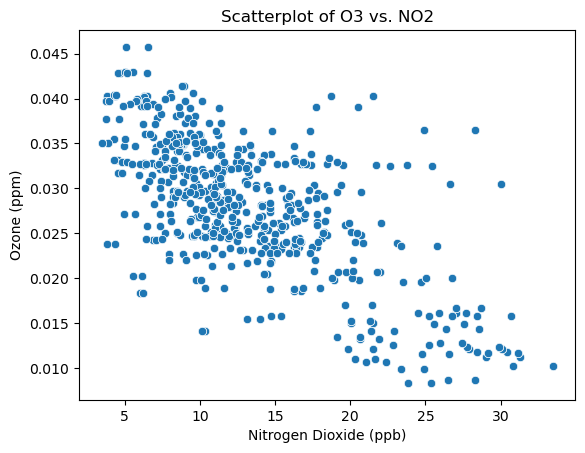

In [8]:
on = sns.scatterplot(data=df_all, x='NO2', y='O3')
on.set_xlabel('Nitrogen Dioxide (ppb)')
on.set_ylabel('Ozone (ppm)')
on.set_title('Scatterplot of O3 vs. NO2')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Thaomy\AppData\Local\Temp\ipykernel_3580\3749922370.py:2: SyntaxWarning: invalid escape sequence '\m'
  op.set_xlabel('PM2.5 Concentration ($\mu g / m^3$)')


Text(0.5, 1.0, 'Scatterplot of O3 vs. PM2.5')

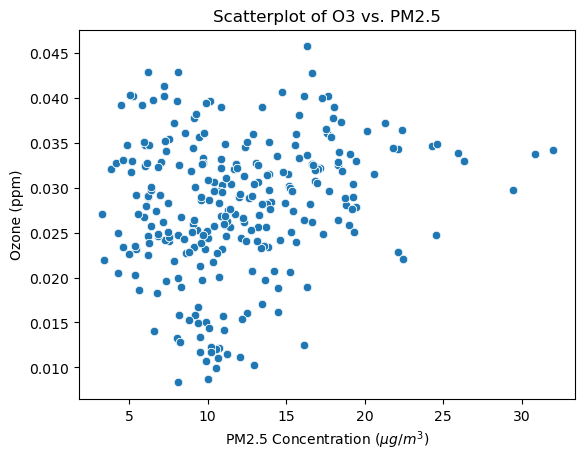

In [9]:
op = sns.scatterplot(data=df_all, x='PM', y='O3')
op.set_xlabel('PM2.5 Concentration ($\mu g / m^3$)')
op.set_ylabel('Ozone (ppm)')
op.set_title('Scatterplot of O3 vs. PM2.5')

In [10]:
months = pd.DatetimeIndex(df_all['date']).month.values # without the .values, it would spit out a nd64 index
months

array([1, 1, 1, ..., 9, 9, 9])

In [11]:
sIdx = months - months #Set values (including winter) to zero

sIdx[months == 12] = 0 #Set winter to 1
sIdx[months == 1] = 0
sIdx[months == 2] = 0

sIdx[months == 6] = 1 #Set summer to 1
sIdx[months == 7] = 1
sIdx[months == 8] = 1

sIdx[months == 3] = -1 #Set spring to -1
sIdx[months == 4] = -1
sIdx[months == 5] = -1

sIdx[months == 9] = -1 #Set fall to -1
sIdx[months == 10] = -1
sIdx[months == 11] = -1

In [12]:
sIdx

array([ 0,  0,  0, ..., -1, -1, -1])

In [13]:
df_all['Season'] = sIdx
df_all.describe()

,NO2,O3,PM,Season
count,1084.000000,1084.000000,1084.000000,1084.000000
mean,13.306238,0.027882,11.936013,-0.103321
std,6.205608,0.007571,5.099546,0.878820
min,3.458333,0.008333,3.250000,-1.000000
25%,8.780952,0.023833,8.145833,-1.000000
50%,11.618750,0.028458,10.912500,0.000000
75%,16.641667,0.032958,15.154167,1.000000
max,33.466667,0.045750,31.979167,1.000000


In [14]:
df_all = df_all[df_all['Season'] > -1] # should keep only winter(0) and summer(1)
df_all.describe()

,NO2,O3,PM,Season
count,604.000000,604.000000,604.000000,604.000000
mean,14.908291,0.025534,11.883327,0.609272
std,6.819712,0.007501,4.928007,0.488318
min,4.250000,0.008333,3.250000,0.000000
25%,9.700000,0.022000,8.545833,0.000000
50%,13.425000,0.026417,10.900000,1.000000
75%,19.133333,0.031542,15.266667,1.000000
max,33.466667,0.042833,31.979167,1.000000


In [15]:
array_all = df_all.to_numpy()

In [16]:
array_all

array([[4.816667, '2023-01-01', 0.031708, 5.0875, 0],
       [4.55, '2023-01-01', 0.031708, 5.0875, 0],
       [4.55, '2023-01-01', 0.031708, 5.0875, 0],
       ...,
       [18.208333, '2023-08-31', 0.025042, 19.341667, 1],
       [20.458333, '2023-08-31', 0.025042, 19.341667, 1],
       [20.458333, '2023-08-31', 0.025042, 19.341667, 1]], dtype=object)

In [17]:
Xvar = df_all[['O3','NO2','PM']].to_numpy()

In [18]:
Xvar

array([[ 0.031708,  4.816667,  5.0875  ],
       [ 0.031708,  4.55    ,  5.0875  ],
       [ 0.031708,  4.55    ,  5.0875  ],
       ...,
       [ 0.025042, 18.208333, 19.341667],
       [ 0.025042, 20.458333, 19.341667],
       [ 0.025042, 20.458333, 19.341667]])

In [19]:
yvar = np.array(df_all['Season'])

In [20]:
yvar

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Prediction using a Ridge Classifier
1. shown below
2. I'm using a ridge regression, which tries to minimize (y_true - y_predicted)^2 + alpha (coefficient)^2
3. Trained/fitted on training data and scored on trained data, the optimal ridge penalty parameter is 0
4. Trained/fitted on training data and scored on validation data, the optimal ridge penalty parameter is 0.1
5. I'm defining model error using the .score function, which returns R^2 or the coefficient of determination. R^2 is 1 - (regression sum of squares / residual sum of squares), so that 1 means the model accurately predicted the actual data and this accuracy decreases as the number gets closer to 0. Trained/fitted on training data, scored on test data, and with the parameter at 0.1, the score is 0.8360655737704918. 0.1 was not the optimal ridge penalty parameter for the test data, but 0.1 was chosen as it was the optimal ridge parameter when we were validating.
6. When I split the data to 60% train, 20% validation, and 20% test, the optimal ridge penalty parameter based on training data was still 0, but there was no optimal ridge penalty paramter on validation data as the scores were the same throughout. For the final model error aka the score of the fitted model on the test data, the scores were lower for this split.
7. For the logistic regression model, I should the same train/validation/test datasets as my first ridge regression. When comparing the logistic regression score to the ridge regression score, the logistic regression scores were higher and therefore, I think it performs better. 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# I want 75% train, 10% test, 15% validate
X, X_test, y, y_test = train_test_split(Xvar, yvar, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.167)

In [23]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train, y_train)
    score = seasonClassifier.score(X_train, y_train)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.8517699115044248
Parameter: 0.1, Score: 0.8495575221238938
Parameter: 0.2, Score: 0.8473451327433629
Parameter: 0.30000000000000004, Score: 0.8495575221238938
Parameter: 0.4, Score: 0.8495575221238938
Parameter: 0.5, Score: 0.8495575221238938
Parameter: 0.6000000000000001, Score: 0.8495575221238938
Parameter: 0.7000000000000001, Score: 0.8495575221238938
Parameter: 0.8, Score: 0.8495575221238938
Parameter: 0.9, Score: 0.8495575221238938
Parameter: 1.0, Score: 0.8495575221238938


In [24]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train, y_train)
    score = seasonClassifier.score(X_val, y_val)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.8351648351648352
Parameter: 0.1, Score: 0.8461538461538461
Parameter: 0.2, Score: 0.8351648351648352
Parameter: 0.30000000000000004, Score: 0.8351648351648352
Parameter: 0.4, Score: 0.8351648351648352
Parameter: 0.5, Score: 0.8351648351648352
Parameter: 0.6000000000000001, Score: 0.8351648351648352
Parameter: 0.7000000000000001, Score: 0.8351648351648352
Parameter: 0.8, Score: 0.8351648351648352
Parameter: 0.9, Score: 0.8351648351648352
Parameter: 1.0, Score: 0.8351648351648352


In [25]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train, y_train)
    score = seasonClassifier.score(X_test, y_test)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.8360655737704918
Parameter: 0.1, Score: 0.8360655737704918
Parameter: 0.2, Score: 0.8360655737704918
Parameter: 0.30000000000000004, Score: 0.8524590163934426
Parameter: 0.4, Score: 0.8524590163934426
Parameter: 0.5, Score: 0.8524590163934426
Parameter: 0.6000000000000001, Score: 0.8524590163934426
Parameter: 0.7000000000000001, Score: 0.8524590163934426
Parameter: 0.8, Score: 0.8524590163934426
Parameter: 0.9, Score: 0.8524590163934426
Parameter: 1.0, Score: 0.8524590163934426


In [26]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train, y_train)
    score = seasonClassifier.score(Xvar, yvar)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.847682119205298
Parameter: 0.1, Score: 0.847682119205298
Parameter: 0.2, Score: 0.8443708609271523
Parameter: 0.30000000000000004, Score: 0.847682119205298
Parameter: 0.4, Score: 0.847682119205298
Parameter: 0.5, Score: 0.847682119205298
Parameter: 0.6000000000000001, Score: 0.847682119205298
Parameter: 0.7000000000000001, Score: 0.847682119205298
Parameter: 0.8, Score: 0.847682119205298
Parameter: 0.9, Score: 0.847682119205298
Parameter: 1.0, Score: 0.847682119205298


### Redoing Train/Validation/Test Splits

In [27]:
# I want 60% train, 20% test, 20% validate
X1, X_test1, y1, y_test1 = train_test_split(Xvar, yvar, test_size=0.20)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.25)

In [28]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train1, y_train1)
    score = seasonClassifier.score(X_train1, y_train1)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.8425414364640884
Parameter: 0.1, Score: 0.8342541436464088
Parameter: 0.2, Score: 0.8342541436464088
Parameter: 0.30000000000000004, Score: 0.8342541436464088
Parameter: 0.4, Score: 0.8342541436464088
Parameter: 0.5, Score: 0.8342541436464088
Parameter: 0.6000000000000001, Score: 0.8314917127071824
Parameter: 0.7000000000000001, Score: 0.8314917127071824
Parameter: 0.8, Score: 0.8314917127071824
Parameter: 0.9, Score: 0.8314917127071824
Parameter: 1.0, Score: 0.8314917127071824


In [29]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train1, y_train1)
    score = seasonClassifier.score(X_val1, y_val1)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.9008264462809917
Parameter: 0.1, Score: 0.9008264462809917
Parameter: 0.2, Score: 0.9008264462809917
Parameter: 0.30000000000000004, Score: 0.9008264462809917
Parameter: 0.4, Score: 0.9008264462809917
Parameter: 0.5, Score: 0.9008264462809917
Parameter: 0.6000000000000001, Score: 0.9008264462809917
Parameter: 0.7000000000000001, Score: 0.9008264462809917
Parameter: 0.8, Score: 0.9008264462809917
Parameter: 0.9, Score: 0.9008264462809917
Parameter: 1.0, Score: 0.9008264462809917


In [30]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train1, y_train1)
    score = seasonClassifier.score(X_test1, y_test1)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.8264462809917356
Parameter: 0.1, Score: 0.8347107438016529
Parameter: 0.2, Score: 0.8347107438016529
Parameter: 0.30000000000000004, Score: 0.8347107438016529
Parameter: 0.4, Score: 0.8347107438016529
Parameter: 0.5, Score: 0.8347107438016529
Parameter: 0.6000000000000001, Score: 0.8264462809917356
Parameter: 0.7000000000000001, Score: 0.8264462809917356
Parameter: 0.8, Score: 0.8264462809917356
Parameter: 0.9, Score: 0.8264462809917356
Parameter: 1.0, Score: 0.8264462809917356


In [32]:
parameter = np.arange(0,1.1,0.1)

for i in parameter:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train1, y_train1)
    score = seasonClassifier.score(Xvar, yvar)
    print(f'Parameter: {i}, Score: {score}')

Parameter: 0.0, Score: 0.8509933774834437
Parameter: 0.1, Score: 0.847682119205298
Parameter: 0.2, Score: 0.847682119205298
Parameter: 0.30000000000000004, Score: 0.847682119205298
Parameter: 0.4, Score: 0.847682119205298
Parameter: 0.5, Score: 0.847682119205298
Parameter: 0.6000000000000001, Score: 0.8443708609271523
Parameter: 0.7000000000000001, Score: 0.8443708609271523
Parameter: 0.8, Score: 0.8443708609271523
Parameter: 0.9, Score: 0.8443708609271523
Parameter: 1.0, Score: 0.8443708609271523


### Prediction using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
score = LogReg.score(X_train, y_train)
print(score)

0.8716814159292036


In [35]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
score = LogReg.score(X_val, y_val)
print(score)

0.8571428571428571


In [36]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
score = LogReg.score(X_test, y_test)
print(score)

0.8852459016393442


In [37]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
score = LogReg.score(Xvar, yvar)
print(score)

0.8708609271523179
